In [1]:
from pathlib import Path

from forecasting_models.univariate_models.arima.model import ARIMAForecastModel

arima_model = ARIMAForecastModel(Path("__file__").parent / Path("examples/configs/arima/arima_example_6_step.yaml"))

In [2]:
from data_utils.csv_utils import read_timeseries_csv

train_df = read_timeseries_csv(arima_model.config.data_path)

(3024, 1)

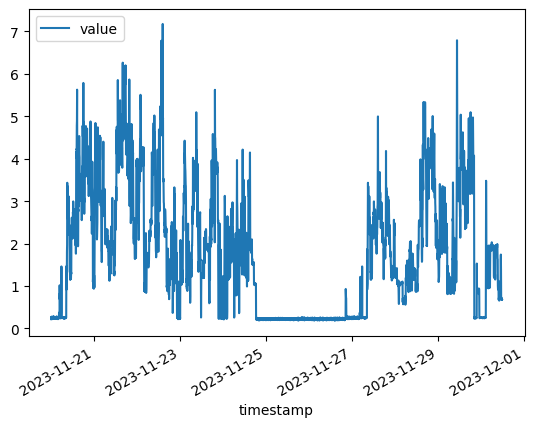

In [3]:
train_df.plot()
train_df.shape

In [4]:
arima_model.train()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 3024
Model:               SARIMAX(6, 1, 1)   Log Likelihood               -1702.661
Date:                Thu, 02 May 2024   AIC                           3423.323
Time:                        16:23:09   BIC                           3477.449
Sample:                    11-20-2023   HQIC                          3442.784
                         - 11-30-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   3.079e-05      0.000      0.159      0.873      -0.000       0.000
ar.L1          0.7843      0.013     59.709      0.000       0.759       0.810
ar.L2          0.0761      0.017      4.531      0.000       0.043       0.109
ar.L3         -0.0199      0.019     -1.039      0.299      -0.057       0.018
ar.L4          0.0810      0.018      4.465      0.000       0.045       0.117
ar.L5         -0.0329      0.019     -1.771      0.077      -0.069       0.004
ar.L6          0.0199      0.015      1.298      0.194      -0.010       0.050
ma.L1         -0.9775      0.008   -127.298      0.000      -0.993      -0.962
sigma2         0.1820      0.002     76.439      0.000       0.177       0.187
===================================================================================
Ljung-Box (L1) (Q):                   0.17   Jarque-Bera (JB):              5981.56
Prob(Q):                              0.68   Prob(JB):                         0.00
Heteroskedasticity (H):               0.62   Skew:                             0.57
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.80
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [5]:
arima_model.order()

(6, 1, 1)

In [6]:
test_df = read_timeseries_csv("./examples/sample_data/univar_data/cpu_example_5min_TEST.csv")

<Axes: xlabel='timestamp'>

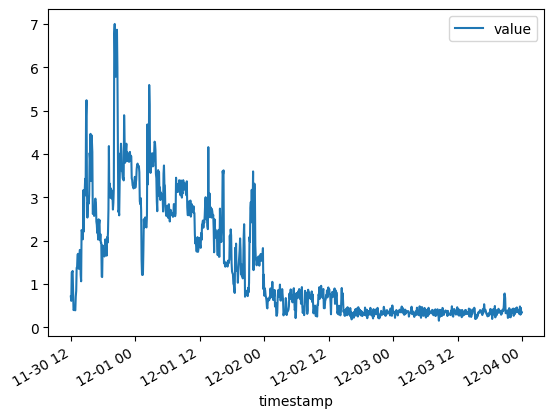

In [7]:
test_df.plot()

In [8]:
actuals, preds = arima_model.test(test_df)

In [9]:
test_eval_val, test_eval_df = arima_model.evaluate_test(
    actuals,
    preds,
    method="mse",
)

In [10]:
print(test_eval_val)

0.2874521353903874


In [11]:
print(test_eval_df)

                       actual  predicted      diff
2023-11-30 12:05:22  0.710193   0.721894 -0.011700
2023-11-30 12:10:22  0.610811   0.748278 -0.137467
2023-11-30 12:15:22  1.269129   0.774780  0.494349
2023-11-30 12:20:22  1.274023   0.795243  0.478780
2023-11-30 12:25:22  1.301465   0.816293  0.485172
...                       ...        ...       ...
2023-12-03 23:40:22  0.481985   0.330302  0.151683
2023-12-03 23:45:22  0.292546   0.337345 -0.044799
2023-12-03 23:50:22  0.450036   0.335878  0.114157
2023-12-03 23:55:22  0.322604   0.338826 -0.016222
2023-12-04 00:00:22  0.345922   0.339269  0.006653

[1008 rows x 3 columns]


In [12]:
anomaly_df = arima_model.flag_anomalies(actuals, preds, threshold_margin_size=10)

In [13]:
anomaly_count = len(anomaly_df[anomaly_df["is_anomaly"] == 1])
print(f"Anomaly count: {anomaly_count}")

anomaly_df.head()

Anomaly count: 0


,actual,predicted,diff,is_anomaly
2023-11-30 12:05:22,0.710193,0.721894,-0.011700,0
2023-11-30 12:10:22,0.610811,0.748278,-0.137467,0
2023-11-30 12:15:22,1.269129,0.774780,0.494349,0
2023-11-30 12:20:22,1.274023,0.795243,0.478780,0
2023-11-30 12:25:22,1.301465,0.816293,0.485172,0


In [14]:
from forecasting_models.general_plotter import GeneralPlotter

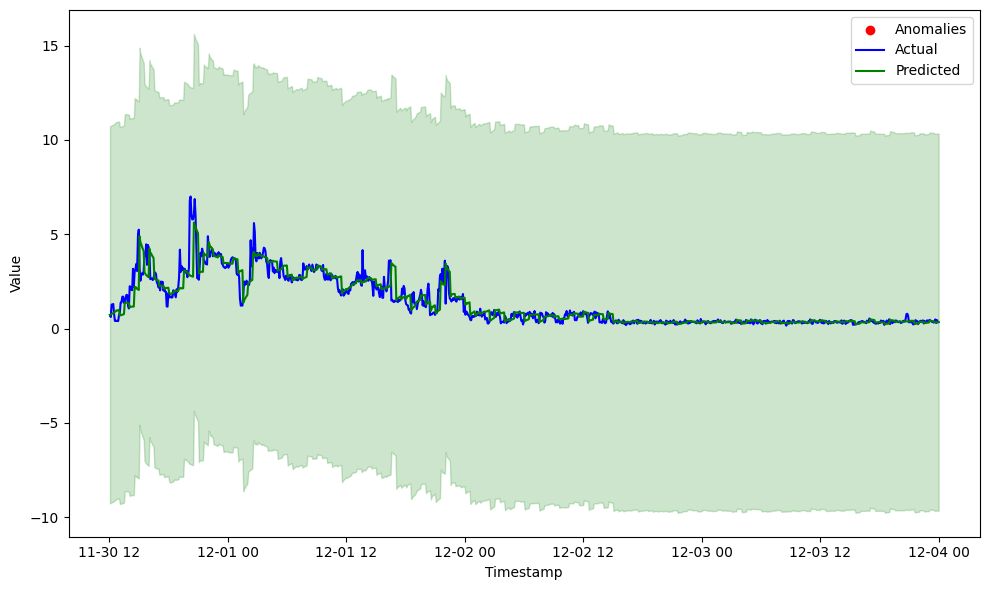

In [15]:
GeneralPlotter.plot_anomalies(anomaly_df, 10)

In [16]:
import pandas as pd

single_shot_preds = arima_model.predict(
    pd.Timestamp(test_df[arima_model.config.target_variable].index[0]) - pd.Timedelta(arima_model.config.preprocessing_parameters.dataset_timedelta)
)
print(single_shot_preds)

2023-11-30 12:05:22    0.721894
2023-11-30 12:10:22    0.748278
2023-11-30 12:15:22    0.774780
2023-11-30 12:20:22    0.795243
2023-11-30 12:25:22    0.816293
2023-11-30 12:30:22    0.834662
Freq: 5min, dtype: float64


In [17]:
single_shot_eval_val, single_shot_eval_df = arima_model.evaluate_prediction(
    test_df[:arima_model.config.forecasting_parameters.forecast_horizon_size][arima_model.config.target_variable],
    method="mse",
)

In [18]:
print(single_shot_eval_val)

0.12158712854974411


In [19]:
print(single_shot_eval_df)

                       actual  predicted      diff
2023-11-30 12:05:22  0.710193   0.721894 -0.011700
2023-11-30 12:10:22  0.610811   0.748278 -0.137467
2023-11-30 12:15:22  1.269129   0.774780  0.494349
2023-11-30 12:20:22  1.274023   0.795243  0.478780
2023-11-30 12:25:22  1.301465   0.816293  0.485172
2023-11-30 12:30:22  0.796116   0.834662 -0.038546
